# Homework 3

## Kevin Han

## Normal and t distributions
## t-test


An experiment was conducted to determine the effect of children participating in a given meal preparation on calorie intake for that meal. Data are recorded below. 

Save the data to a format that can be read into python. Read the data in for analysis. Data is provided in two separted CSV files. 

* Use python to calculate the quantities and generate the visual summaries requested below. You will lose points if you are not utilizing python.

* You can use scipy libary or other libraries to do your tests or you can implement them from scratch in python 



In [93]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import researchpy as rp
import math

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [94]:
nonP = pd.read_csv('nonparticipants.csv')
P = pd.read_csv('participants.csv')

# Question - 1
Summarize the data by whether children participated in the meal preparation or not. Use an appropriately labelled table to show the results. Also include a graphical presentation that shows the distribution of calories for participants vs. non-participants. Describe the shape of each distribution and comment on the similarity (or lack thereof) between the distributions in each population. **(2 points)**

Be aware that there is not one specific way the graph needs to look. Experiment with different types of graphs, and different parameters for the graph type. Your goal is to present the data as readable as possible. 

In [95]:
# Just use describe to summarize data
print('NONPARTICIPANT STATISTICS:')
print(nonP['nonparticipants'].describe(), end = '\n\n')
print('PARTICIPANT STATISTICS:')
print(P['participants'].describe(), end = '\n\n')

NONPARTICIPANT STATISTICS:
count     22.000000
mean     374.071818
std      133.139285
min      139.690000
25%      296.392500
50%      374.740000
75%      445.557500
max      688.770000
Name: nonparticipants, dtype: float64

PARTICIPANT STATISTICS:
count     25.000000
mean     410.079600
std      121.513786
min      210.990000
25%      298.380000
50%      424.940000
75%      456.300000
max      635.210000
Name: participants, dtype: float64



Bin width = 49.91636363636363 calories.


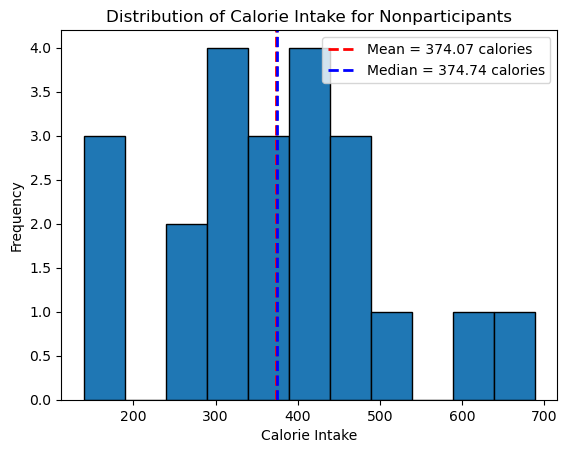

In [96]:
# We could show the distribution with a histogram. Below is the one for nonparticipants
nonPcal, Pcal = np.array(nonP['nonparticipants']), np.array(P['participants'])
plt.title('Distribution of Calorie Intake for Nonparticipants')
binNum1 = 11
plt.hist(nonPcal, bins = binNum1, edgecolor = 'black')
plt.xlabel('Calorie Intake')
plt.ylabel('Frequency')
mean1 = round(np.mean(nonPcal), 2)
median1 = np.median(nonPcal)
plt.axvline(mean1, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean1} calories')
plt.axvline(median1, color='blue', linestyle='dashed', linewidth=2, label=f'Median = {median1} calories')
plt.legend()
print('Bin width = ' + str((max(nonPcal) - min(nonPcal))/binNum1) + ' calories.')

Bin width = 47.135555555555555 calories.


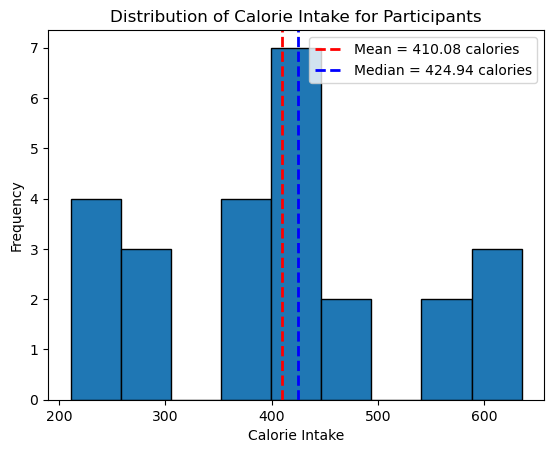

In [97]:
# And here is the one for participants
plt.title('Distribution of Calorie Intake for Participants')
binNum2 = 9
plt.hist(Pcal, bins = binNum2, edgecolor = 'black')
plt.xlabel('Calorie Intake')
plt.ylabel('Frequency')
mean2 = round(np.mean(Pcal), 2)
median2 = np.median(Pcal)
plt.axvline(mean2, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean2} calories')
plt.axvline(median2, color='blue', linestyle='dashed', linewidth=2, label=f'Median = {median2} calories')
plt.legend()
print('Bin width = ' + str((max(Pcal) - min(Pcal))/binNum2) + ' calories.')

**Summary**


At around the same bin width, the calorie intake for participants seem to display a more normal distribution than that of the nonparticipants. The distribution for nonparticipants are also more sparse, and appears to show a bimodal distribution at higher bin numbers. However, with a smaller bin number, both distributions show a relatively normal distribution.

# Question - 2 

Does the mean calorie consumption for those who participated in the meal preparation differ from **425**? Formally test at the $\alpha = 0.05$ level using the 5 steps outlined in the module. **(6 points)**


# ANSWER

**Hypotheses and Alpha Level**

$H_0$: $\mu$ = 425 

$H_1$: $\mu$ $\neq$ 425 

$\alpha$ = 0.05 

**Appropriate Test Statistic**

$t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$, use two-sided t-test.

**Decision Rule**

Degrees of freedom is 24. Critical value is 2.064 based on two-tail probability of $\alpha=0.05$. Thus, reject $H_0$ if |t|>2.064, otherwise fail to reject. 

**Statistic is computed below**


In [107]:
# Use scipy's 1 sample ttest. Must use 2-sided.
t_stat, p_value = sc.stats.ttest_1samp(Pcal, 425, alternative = 'two-sided')

# Print parameters
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -0.6139385690489593
p-value: 0.5450319510318798


**Conclusion**

We fail to reject the null hypothesis as $|t| < 2.064$ and $p > \alpha$. Thus, the mean calorie consumption for participants do not significantly differ from 425. 

# Question 3 
Calculate a **90%** confidence interval for the mean calorie intake for participants in the meal preparation. Interpret the confidence interval. **(6 points)**

# ANSWER

We must use a two-tailed analysis. Based on $df = 24$ and $\alpha = 1 - CI = 1 - 90\% = 0.10$, the critical t value $t_{crit}$ is 1.711, which is the same as the one-tailed 0.05 $\alpha$. 

Then, confidence interval is given by $\left[ \bar{x} \pm t_{crit} \times \frac{s}{\sqrt{n}} \right]$. It is calculated below.

In [92]:
xbar, s, n = np.mean(Pcal), np.std(Pcal), len(Pcal)
print(xbar - s/math.sqrt(n))
print(xbar + s/math.sqrt(n))

386.267858173884
433.89134182611593


Thus, we are 90\% confident that the true mean calorie intake for participants in the meal preparation lie in between 386.27 and 433.89 calories.

# Question 4 
Formally test whether or not participants consumed 
more calories than non-participants at the $\alpha = 0.05$ level using the 5 steps procedure for hypothesis tests. **(6 points )**

**Hypotheses and Alpha Level**

$H_0$: $\bar{x}_p = \bar{x}_{np}$, the mean calorie consumption between participants and nonparticipants is the same.

$H_1$: $\bar{x}_p > \bar{x}_{np}$, the mean calorie consumption for participants were greater than nonparticipants.

$\alpha$ = 0.05 

**Appropriate Test Statistic**

$t = \frac{(\bar{x_1}-\bar{x_2}) - (\mu_1 - \mu_2)}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$, used t-test since n is small and the sd of the population in unknown.

**Decision Rule**

$df = min\{n_1 - 1, n_2 - 1\} = 21$

Critical value is 1.721. Must use one-tailed as we are testing if one is greater than the other.

Decision rule is that if $t>1.721$, reject $H_0$. Otherwise, do not reject $H_0$.

**Statistic is computed below**

In [106]:
# Use scipy ttest for 2 individual samples using one-sided alternative
t_stat2, p_value2 = sc.stats.ttest_ind(Pcal, nonPcal, alternative = 'greater')

# Print parameters
print("t-statistic:", t_stat2)
print("p-value:", p_value2)


t-statistic: 0.9693504409241457
p-value: 0.1687759109713235


**Conclusion**

We fail to reject the null hypothesis $H_0$ as $t < 1.721$ and $p > \alpha$. Therefore calorie consumption between participants and nonparticipants are not significantly different.